In [69]:
using LinearAlgebra
using IJulia
using Plots
using Printf
using Noise
using CSV
using DataFrames


** Problem 2.5 **

In [71]:
σ = 10* [2 5 3
        5 1 4
        3 4 3]

vals = eigvals(σ)
print("Eigenvalues are ", vals)

## Part 2
vecs = eigvecs(σ)
print("\nEigenvectors are \n")
display(vecs)

## Part 3 
τmax = (maximum(vals)-minimum(vals))/2
print("\nτmax is ", τmax)

##Part 4
σᵥ = sqrt(1/2*((σ[1,1]-σ[1,2])^2 + (σ[2,2]-σ[3,3])^2 + (σ[3,3] - σ[1,1])^2 + 6*(σ[1,2]^2 + σ[2,3]^2 + σ[3,1]^2)))
print("\nσᵥ is " , σᵥ)

Eigenvalues are [-37.32050807568878, -2.679491924311231, 100.0]
Eigenvectors are 


3×3 Matrix{Float64}:
  0.57735   -0.57735   -0.57735
 -0.788675  -0.211325  -0.57735
  0.211325   0.788675  -0.57735


τmax is 68.6602540378444
σᵥ is 125.29964086141668

In [76]:
## Part 5
Q = 1/3 * [1 -2 2;
    2 -1 -2;
    2 2 1]

σnew = Q' * σ * Q

vals, vecs = eigen(σnew)
print("The values are the same as before: ", vals , "\nThe vectors are the same as before: \n")
display(vecs)
τmax = (maximum(vals)-minimum(vals))/2
print("\nτmax is the same as before, ", τmax, "\n")
σᵥ = sqrt(1/2*((σ[1,1]-σ[1,2])^2 + (σ[2,2]-σ[3,3])^2 + (σ[3,3] - σ[1,1])^2 + 6*(σ[1,2]^2 + σ[2,3]^2 + σ[3,1]^2)))
print("\nσᵥ is the same as before: ", σᵥ)

The values are the same as before: [-37.32050807568879, -2.6794919243112307, 99.99999999999994]
The vectors are the same as before: 


3×3 Matrix{Float64}:
  0.19245    0.19245    -0.96225
 -0.0188748  0.981125    0.19245
 -0.981125   0.0188748  -0.19245


τmax is the same as before, 68.66025403784437

σᵥ is the same as before: 125.29964086141668

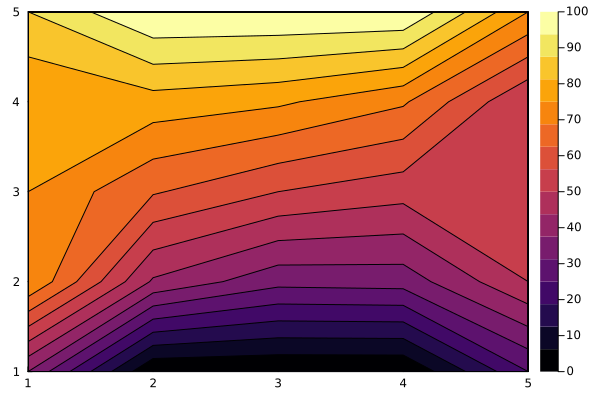

In [70]:

A = zeros(Float64, 9,9)
A[1,:] = [4, -1, 0, -1, 0, 0, 0, 0, 0]
A[2,:] = [-1, 4, -1, 0, -1, 0, 0, 0, 0]
A[3,:] = [0, -1, 4, 0, 0, -1, 0, 0, 0]
A[4,:] = [-1, 0, 0, 4, -1, 0, -1, 0, 0]
A[5,:] = [0, -1, 0, -1, 4, -1, 0, -1, 0]
A[6,:] = [0, 0, -1, 0, -1, 4, 0, 0, -1]
A[7,:] = [0, 0, 0, -1, 0, 0, 4, -1, 0]
A[8,:] = [0, 0, 0, 0, -1, 0, -1, 4, -1]
A[9,:] = [0, 0, 0, 0 ,0, -1, 0, -1, 4]

b = [75; 0; 50; 75; 0; 50; 175; 100; 150]



x = A\b

newx = reshape(x,3,3)

boarder = zeros(Float64, 5,5)
boarder[1,:] = [87.5 100 100 100 75]
boarder[2,:] = [ 75 x[7:9]' 50]
boarder[3,:] = [75 x[4:6]' 50]
boarder[4,:] = [75 x[1:3]' 50]
boarder[5,:] = [75/2 0 0 0 25]

con = contour(reverse(boarder, dims = 1), fill=true)

xForLater = x
display(con)


In [31]:

##PART 2
eigStuff = eigen(A)
eigVals = eigStuff.values

K =  maximum(eigVals)/minimum(eigVals)
print("my condition is:")
print(K)

print("\nthe built in condition function is:")
print(cond(A))


my condition is:5.828427124746191
the built in condition function is:5.8284271247461925

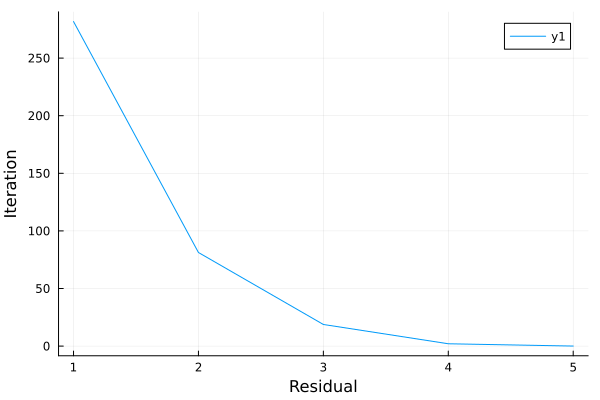

In [68]:

##PART 3

function myBiCSTAB(A, xInitialGuess, b, xForLater, tolerance = 1e-6)
    
    x = xInitialGuess
    r = b-A*x
    r0hat = r
    if(dot(r0hat,r) == 0)
        print("You fucked up")
    end

    rhoPrev = 1
    alpha = 1
    omega = 1


    v = zeros(Float64, 9, 1)
    p = zeros(Float64, 9, 1)

    rho = 0.
    beta = 0.
    h = 0.
    s = 0.
    t = 0.

    residual = Vector([])


    while(true)
        push!(residual,norm(r))
        rho = dot(r0hat, r)
        beta = (rho / rhoPrev) * (alpha / omega)
        p = r + beta*(p-omega*v)
        v = A*p
        alpha = rho / dot(r0hat, v)
        h = x + alpha*p
        if(norm(h-xForLater) < 1e-6)
            x = h
            break
        end
        s = r - alpha*v
        t = A*s
        omega = dot(t,s)/dot(t,t)
        x = h + omega*s
        if(norm(x-xForLater) < 1e-6)
            break
        end
        r = s-omega*t
        rhoPrev = rho
    end
    return(x, residual)
end

x = zeros(Float64, 9, 1)

answer = myBiCSTAB(A, x, b, xForLater)
#display(answer[1])
myPlot = plot(answer[2])
xlabel!("Residual")
ylabel!("Iteration")
display(myPlot)

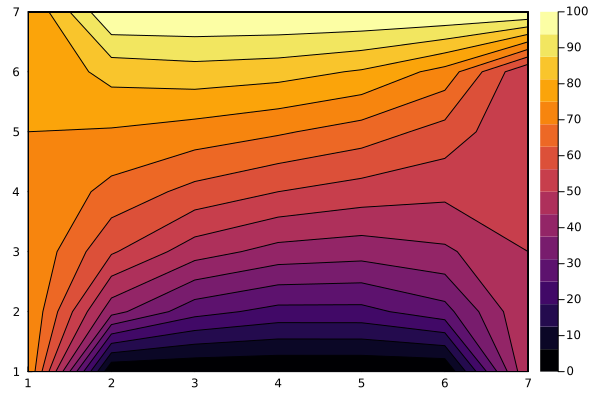

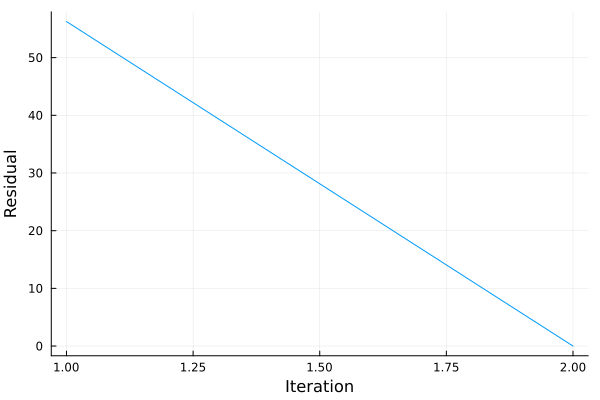

In [66]:
function gaussSeidel(nx,ny, tol, maxIter, T0, w; verbose=false)

    T = copy(T0)
    residuals = zeros(nx,ny)

    flag = 0
    iter = 0
    while flag == 0
        iter += 1 # iter = iter + 1

        # update all the open values of T
        # T[i,j] = 1/4*( T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1]  )

        # Gauss-Seidel (no Tnew)
        for i = 2:nx-1
            for j = 2:ny-1
                Ts = 1/4*( T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1]  )
                T[i,j] = (1-w)*T[i,j] + w*Ts
            end
        end
        
        for i = 2:nx-1
            for j = 2:ny-1
                residuals[i,j] = T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1] - 4*T[i,j]
            end
        end

        if verbose
            @printf("iter=%3d, |res|=%.3e\n", iter, norm(residuals))
        end

        if norm(residuals) <= tol
            flag = 1
        elseif iter >= maxIter
            flag = -1
            error("Failed to converge")
        end

    end

    return (T, iter)
end


function createBoarder(topTemp, botTemp, lhsTemp, rhsTemp, gridSize)
    grid = zeros(gridSize, gridSize)
    for i in 1:size(grid, 1)
        grid[1,i] = topTemp
        grid[size(grid,1),i] = botTemp
        grid[i,1] = lhsTemp
        grid[i,size(grid,1)] = rhsTemp       
    end
    return grid
end

function getGridCenter(grid)
    centerDistance = Int(floor(size(grid,1)/2)+1)
    return grid[centerDistance,centerDistance]
end

function getBIG()
    converged = false
    i = 5

    centerTemps = [0.0]
    resids = Float64[]
    while !converged
        thisGrid = createBoarder(100,0,75,50,i)
        global tempgrid, numIts =  gaussSeidel(i,i,1e-6,30,thisGrid,1.5)
        if abs( getGridCenter(tempgrid)-centerTemps[Int(length(centerTemps))]) < 1e-4
            converged = true
        end
        push!(centerTemps, getGridCenter(tempgrid))
        push!(resids,abs(centerTemps[length(centerTemps)] - centerTemps[length(centerTemps)-1]))
        i += 2
    end
    part2contour = contour(reverse(tempgrid, dims = 1), fill = true)
    part2plot = plot(resids , label = false )
    xlabel!("Iteration")
    ylabel!("Residual")
    return(part2plot, part2contour)
end

part2Plot, part2Contour = getBIG()
display(part2Contour)
display(part2Plot)

    

In [43]:
function modelFunction( x, a)
    return a[1]  + a[2]*x + a[3]*x^2
    end

function changeZeroOneArray(onesPlace, arr)
    arr[:] .= 0
    arr[onesPlace] = 1
end


function buildX(f, x, n)
    X = zeros(Float64, length(x), n)
    zeroOneArray = zeros(Int, n)
    for i in 1:length(x)
        for j in 1:n
            changeZeroOneArray(j, zeroOneArray)
            X[i, j] = f(x[i], zeroOneArray)
        end
    end
    return X
end

## Part 4

function myCurveFit( X, y)
    a = (transpose(X) * X)^-1 * transpose(X) * y
    return a
end



myCurveFit (generic function with 1 method)

**Part 5**

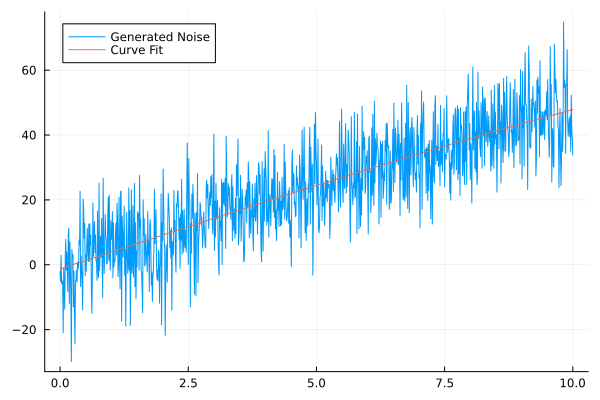

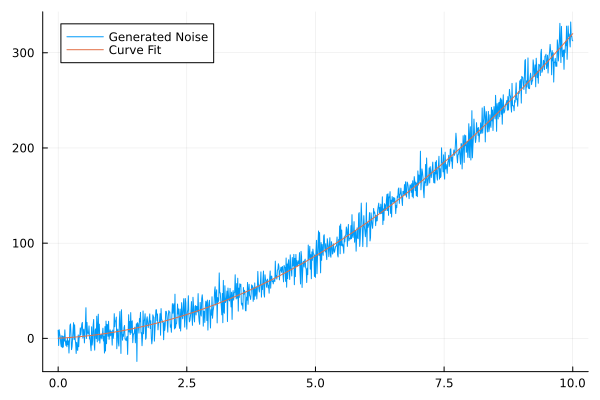

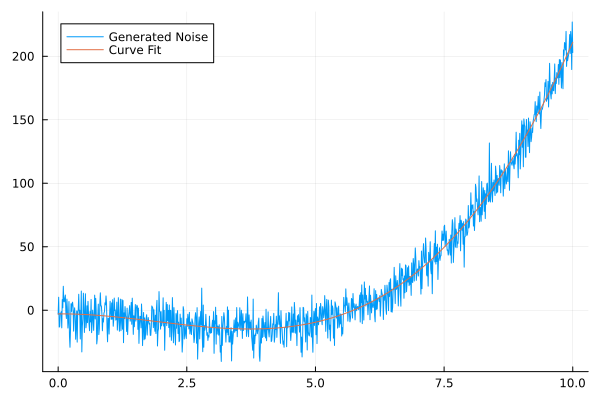

In [64]:

x = [0:.01:10;]

newYVals(x,a) = a[4] .* x.^3 + x.^2 .* a[3] .+ x .* a[2] .+ a[1]

lin = 5 .* x .- 1
quad = 3 .* x.^2  .+ 2 .* x .+ 1
cube = .5 .* x.^3 - 3 .* x.^2 + 1.9 .* x .- 7

ys = [lin, quad, cube]
i = 2
for y in ys
    yWNoise = add_gauss(y, 10)
    a = myCurveFit(buildX(newYVals, x, 4), yWNoise)

    plotLine = a[4] .* x.^3 + x.^2 .* a[3] .+ x .* a[2] .+ a[1]
    #display(a)
    display(plot(x, [yWNoise, plotLine], label = ["Generated Noise" "Curve Fit"]))
    i += 1
end

** Part 6 **

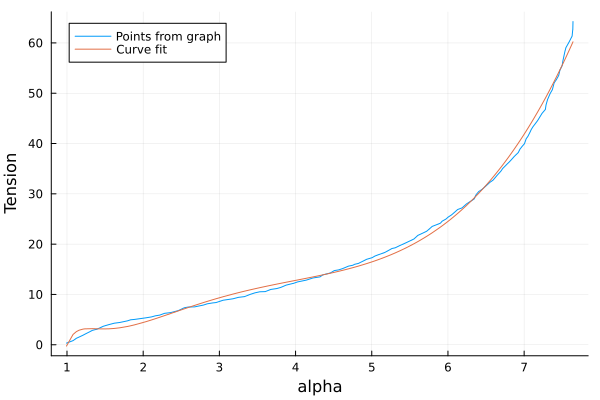


The values of C are:
[24.70905331708491, -18.443361937068403, 27.13641879055649, 0.22515616310374753, -21.84215041110292]

In [61]:
digitizerResultsFrame = DataFrame(CSV.File("curvePoints3.csv"))
plot(digitizerResultsFrame[:,1], digitizerResultsFrame[:,2])

function Cnum(i, j)
    if i == 0 && j == 1
        return 1
    elseif i == 1 && j == 0
        return 2
    elseif i == 1 && j == 1
        return 3
    elseif i == 2 && j == 0
        return 4
    elseif i == 0 && j == 2
        return 5
    end
end

function modelFunctionrubber( λ, C)
    result =  2*(λ-λ^-2) * (C[Cnum(1,0)] + C[Cnum(0,1)] * λ^-1 + 2*C[Cnum(2,0)]*(λ^2 + 2*λ^-1 - 3) + 2*C[Cnum(0,2)]*(2*λ + λ^-2 - 3) + 3 * C[Cnum(1,1)] * (λ - 1 - λ^-1 + λ^-2))
    return result
end

function evaluateRubber()
    avals = myCurveFit(buildX(modelFunctionrubber, digitizerResultsFrame[:,1], 5), digitizerResultsFrame[:,2])

    resultYs = zeros(Float64, length(digitizerResultsFrame[:,1]))
    for i in 1:length(digitizerResultsFrame[:,1])
        resultYs[i] = modelFunctionrubber(digitizerResultsFrame[i,1], avals)
    end
    thisPlot = plot(digitizerResultsFrame[:,1], [digitizerResultsFrame[:,2], resultYs], label = ["Points from graph"  "Curve fit"])
    xlabel!("alpha")
    ylabel!("Tension")
    display(thisPlot)
    return avals

end

avals = evaluateRubber()
print("\nThe values of C are:\n", avals)


** Response to part 6 questions **
Based on the collected data points versus the curve fit, this would be a decent model to use if it was okay to be off by 1 or 2. However, this curve fit does not match the low end of the graph very closely and deviates front the whole graph frequently. With more data points this might be improved but the model function wont be perfect. 